In [1]:
import cv2 # working with, mainly resizing, images
import numpy as np # dealing with arrays
import os # dealing with directories
import matplotlib.pyplot as plt #show plot
import tensorflow as tf #train model using ML
from tensorflow.keras.preprocessing.image import ImageDataGenerator #rescale data
from tensorflow.keras.preprocessing import image #import image
from tensorflow.keras.optimizers import RMSprop #analyze RMSProp
from random import shuffle # mixing up or currently ordered data that might lead our network astray in training.
from tqdm import tqdm # a nice pretty percentage bar for tasks
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization #parameter analyze
from sklearn import datasets, metrics

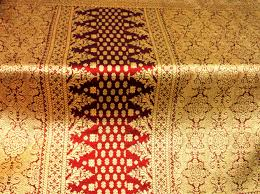

In [2]:
#show sample data
from IPython.display import Image, display

listOfImageNames = ['C:/data/train/sikek/sikek_1.jpg']

for imageName in listOfImageNames:
    display(Image(filename=imageName))

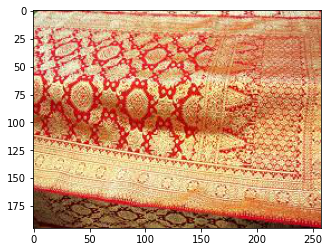

In [4]:
#size of pict
img= image.load_img("C:/data/train/lepus/lepus_1.jpg")
plt.imshow(img)

In [5]:
cv2.imread("C:/data/train/lepus/lepus_1.JPG").shape

(195, 258, 3)

In [6]:
seed = 232
tf.random.set_seed(
    seed
)

In [7]:
train= ImageDataGenerator (rescale= 1/255)
validation= ImageDataGenerator (rescale= 1/255) 

In [8]:
train_dataset =train.flow_from_directory('C:/data/train/',
                                        target_size = (64,64),
                                        batch_size = 30,
                                        class_mode = 'categorical') 
validation_dataset = validation.flow_from_directory('C:/data/validation/',
                                        target_size = (64,64),
                                        batch_size = 30,
                                        class_mode = 'categorical')

Found 240 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [9]:
train_dataset.class_indices

{'lepus': 0, 'lurik': 1, 'sikek': 2}

In [10]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
#Creating model 
model = tf.keras.models.Sequential(# First conv block
                                  [tf.keras.layers.Conv2D(64,(3,3), activation = 'relu', input_shape = (64,64,3)),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   # Second conv block
                                   tf.keras.layers.Conv2D(32,(3,3), activation = 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   #Third conv block
                                   tf.keras.layers.Conv2D(16,(3,3), activation = 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   # FC layer
                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(512, activation = 'relu'),
                                   ## Output layer
                                   tf.keras.layers.Dense(3, activation = 'softmax')
                                   ])


In [12]:
# compiling
hist= model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
model_fit = model.fit(train_dataset, 
                      steps_per_epoch = 8,
                      epochs = 30,
                      validation_data = validation_dataset)

Epoch 1/30
8/8 [==============================] - 5s 454ms/step - loss: 1.1136 - accuracy: 0.2837 - val_loss: 1.0880 - val_accuracy: 0.4167
Epoch 2/30
8/8 [==============================] - 1s 166ms/step - loss: 1.0756 - accuracy: 0.4124 - val_loss: 1.0532 - val_accuracy: 0.4500
Epoch 3/30
8/8 [==============================] - 1s 167ms/step - loss: 0.9677 - accuracy: 0.5775 - val_loss: 1.0943 - val_accuracy: 0.4167
Epoch 4/30
8/8 [==============================] - 1s 168ms/step - loss: 0.9403 - accuracy: 0.4886 - val_loss: 0.9532 - val_accuracy: 0.5167
Epoch 5/30
8/8 [==============================] - 1s 174ms/step - loss: 0.8874 - accuracy: 0.5495 - val_loss: 0.9351 - val_accuracy: 0.5000
Epoch 6/30
8/8 [==============================] - 1s 171ms/step - loss: 0.8016 - accuracy: 0.6054 - val_loss: 1.1971 - val_accuracy: 0.4167
Epoch 7/30
8/8 [==============================] - 2s 193ms/step - loss: 0.9059 - accuracy: 0.5815 - val_loss: 0.9048 - val_accuracy: 0.5167
Epoch 8/30
8/8 [====

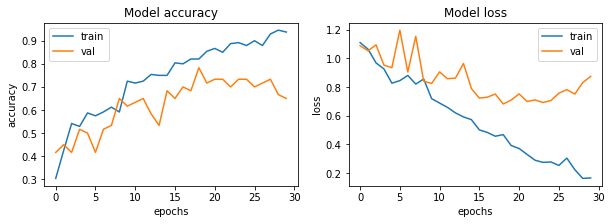

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax = ax.ravel()

for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(model_fit.history[met])
    ax[i].plot(model_fit.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])